In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("C:\\Users\\abhijit.a.pande\\Machine Learning\\Py_DS_ML_BC\\14-K-Nearest-Neighbors\\Classified Data.csv")

In [5]:
df.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()

In [8]:
scaler.fit(df.drop('TARGET CLASS', axis = 1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [9]:
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis = 1))

In [10]:
df_upd = pd.DataFrame (scaled_features, columns = df.columns[:-1])

In [11]:
df_upd.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-1.730320,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.726856,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-1.723391,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,-1.719927,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,-1.716463,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [12]:
from sklearn.model_selection import train_test_split

In [14]:
y = df ['TARGET CLASS'] 

In [15]:
x_train, x_test, y_train, y_test = train_test_split(df_upd, y, test_size = 0.4, random_state = 101)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
knn = KNeighborsClassifier(n_neighbors=1)

In [18]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [19]:
predictions = knn.predict(x_test)

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
print (confusion_matrix(y_test, predictions))

[[189  15]
 [ 21 175]]


In [22]:
print (classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       204
           1       0.92      0.89      0.91       196

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400



In [29]:
error_rate = []
for i in range (1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))
    print (np.mean(pred_i != y_test))

0.09
0.095
0.0725
0.0825
0.0725
0.0625
0.0675
0.0575
0.0625
0.0575
0.0575
0.0525
0.0625
0.0575
0.06
0.0575
0.0525
0.0525
0.0525
0.05
0.0475
0.045
0.0425
0.0375
0.045
0.045
0.0475
0.045
0.0475
0.0375
0.0475
0.04
0.0475
0.045
0.0425
0.045
0.0475
0.045
0.0475


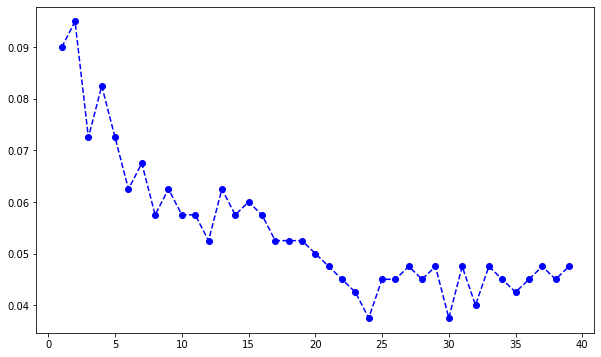

In [24]:
plt.figure(figsize = (10,6))
plt.plot(range (1,40), error_rate, color='blue', linestyle = "dashed", marker = 'o')

In [25]:
knn = KNeighborsClassifier(n_neighbors= 24)

In [26]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=24, p=2,
                     weights='uniform')

In [27]:
predictions = knn.predict(x_test)

In [28]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       204
           1       0.96      0.96      0.96       196

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400

